In [416]:
import os

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymesh
import scipy
import igl

In [860]:
dataset_folder = "/Users/georgiashay/Documents/0Classes/0Undergraduate-MIT/0Senior/UROP/Mesh_Dataset/Obj_Files"

In [861]:
df_s = pd.read_csv("mesh_characteristics.csv")
del df_s["Unnamed: 0"]

In [862]:
df_s.head()

,Filename,Object Number,Mesh Name,Chart Number,Vertices,Faces,Euler Characteristic,Genus,Total Boundary Length,Boundary Faces,Interior Faces,Edge Manifold,Vertex Manifold,Closed,Connectivity Valid
0,object_111_jack_o_lantern_5.obj,111,jack_o_lantern,5,225,316,1,0,132,130,186,True,True,False,True
1,object_218_rover_wheel_39.obj,218,rover_wheel,39,35,42,1,0,26,24,18,True,True,False,True
2,object_87_horse_sculpture_37.obj,87,horse_sculpture,37,4994,9173,-40,0,895,777,8396,True,True,False,True
3,object_121_remote_holder_27.obj,121,remote_holder,27,22,20,1,0,22,20,0,True,True,False,True
4,object_112_minion_toothpaste_holder_squeezer_2...,112,minion_toothpaste_holder_squeezer,21,105,168,1,0,40,38,130,True,True,False,True


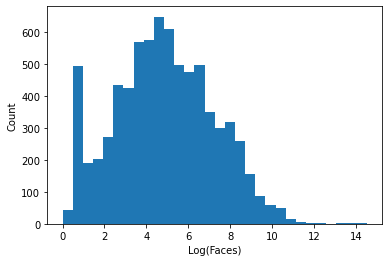

In [863]:
plt.hist(np.log(df_s["Faces"]), bins=30)
plt.ylabel('Count')
plt.xlabel('Log(Faces)')
plt.show()

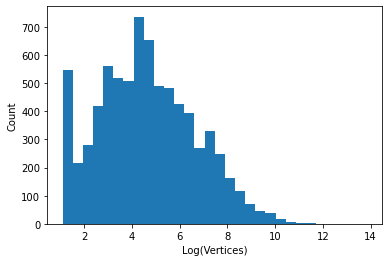

In [864]:
plt.hist(np.log(df_s["Vertices"]), bins=30)
plt.ylabel("Count")
plt.xlabel("Log(Vertices)")
plt.show()

In [865]:
df_i = df_s.set_index("Mesh Name")
largest_charts = df_i["Faces"].max(level="Mesh Name")
smallest_charts = df_i["Faces"].min(level="Mesh Name")

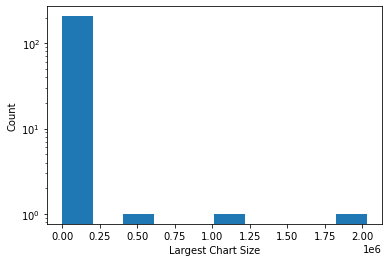

In [866]:
plt.hist(largest_charts)
plt.xlabel("Largest Chart Size")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

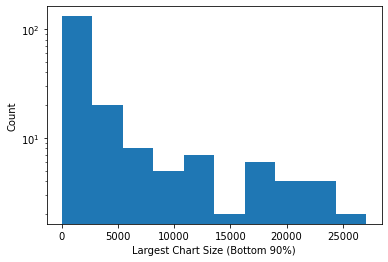

In [867]:
plt.hist(discard_top_percentage(largest_charts, 0.1))
plt.xlabel("Largest Chart Size (Bottom 90%)")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

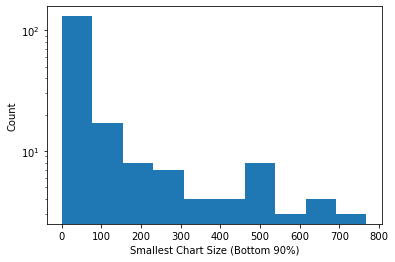

In [868]:
plt.hist(discard_top_percentage(smallest_charts, 0.1))
plt.xlabel("Smallest Chart Size (Bottom 90%)")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

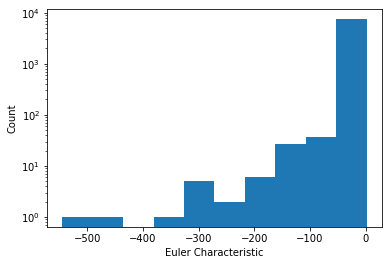

In [869]:
plt.hist(df_s["Euler Characteristic"])
plt.ylabel("Count")
plt.xlabel("Euler Characteristic")
plt.yscale("log")
plt.show()

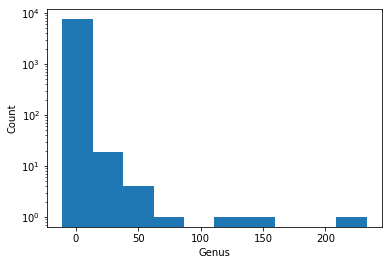

In [870]:
plt.hist(df_s["Genus"])
plt.xlabel("Genus")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

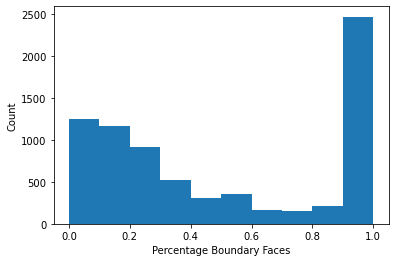

In [871]:
plt.hist(df_s["Boundary Faces"]/(df_s["Faces"]))
plt.xlabel("Percentage Boundary Faces")
plt.ylabel("Count")
plt.show()

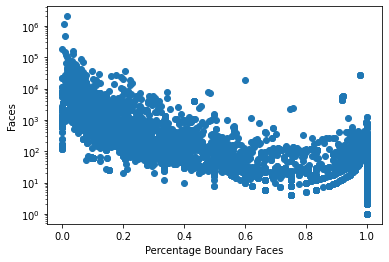

In [872]:
plt.scatter(df_s["Boundary Faces"]/(df_s["Faces"]), df_s["Faces"])
plt.yscale("log")
plt.xlabel("Percentage Boundary Faces")
plt.ylabel("Faces")
plt.show()

In [873]:
np.where(df_s["Boundary Faces"] == df_s["Faces"])

(array([   3,   10,   14, ..., 7526, 7527, 7534]),)

In [874]:
df_s.loc[np.where(df_s["Boundary Faces"] == df_s["Faces"])[0]].sort_values("Faces", ascending=False)

,Filename,Object Number,Mesh Name,Chart Number,Vertices,Faces,Euler Characteristic,Genus,Total Boundary Length,Boundary Faces,Interior Faces,Edge Manifold,Vertex Manifold,Closed,Connectivity Valid
4102,object_129_hellraiser_28.obj,129,hellraiser,28,1280,1278,1,0,1280,1278,0,True,True,False,True
7436,object_129_hellraiser_2.obj,129,hellraiser,2,1280,1278,1,0,1280,1278,0,True,True,False,True
477,object_145_wheel_guard_5.obj,145,wheel_guard,5,803,801,1,0,803,801,0,True,True,False,True
25,object_145_wheel_guard_4.obj,145,wheel_guard,4,777,775,1,0,777,775,0,True,True,False,True
7477,object_172_castle_spiral_staircase_41.obj,172,castle_spiral_staircase,41,773,771,1,0,773,771,0,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,object_67_paint_bucket_28.obj,67,paint_bucket,28,3,1,1,0,3,1,0,True,True,False,True
6862,object_107_whistle_33.obj,107,whistle,33,3,1,1,0,3,1,0,True,True,False,True
1265,object_230_carton_box_5.obj,230,carton_box,5,3,1,1,0,3,1,0,True,True,False,True
6854,object_107_whistle_27.obj,107,whistle,27,3,1,1,0,3,1,0,True,True,False,True


Text(0, 0.5, 'Count')

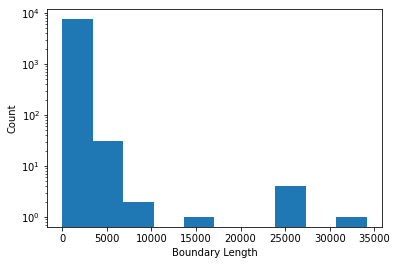

In [516]:
plt.hist(df_s["Total Boundary Length"])
plt.yscale("log")
plt.xlabel("Boundary Length")
plt.ylabel("Count")

In [507]:
df = pd.read_csv("distortion_characteristics.csv")

In [508]:
df.head()

,Unnamed: 0,Filename,Min Area Ratio,Max Area Ratio,Max Area Distortion,Std Dev Area Distortion,Min Edge Length Ratio,Max Edge Length Ratio,Max Edge Length Distortion,Std Dev Edge Length Distortion,Min Singular Value,Max Singular Value,Percentage Flipped Triangles
0,0,object_111_jack_o_lantern_5.obj,0.985022,1.037242,2.001337,1.163790e-04,0.988494,1.022003,2.000474,4.711004e-05,0.988437,1.025709,1.0
1,1,object_218_rover_wheel_39.obj,0.887065,1.141001,2.017424,5.352569e-03,0.770434,1.166533,2.068404,2.148634e-02,0.770434,1.166533,0.5
2,2,object_87_horse_sculpture_37.obj,0.146613,4.918095,6.967279,2.268202e-01,0.295120,4.885592,5.090276,6.531987e-02,0.173454,5.265007,0.0
3,3,object_121_remote_holder_27.obj,0.999185,1.000385,2.000001,2.071642e-07,0.999511,1.000896,2.000001,2.486130e-07,0.999374,1.000900,0.0
4,4,object_112_minion_toothpaste_holder_squeezer_2...,0.753964,2.433649,2.844554,1.677847e-01,0.306554,5.778315,5.951375,7.766408e-01,0.306554,6.091227,0.5


Text(0, 0.5, 'Count')

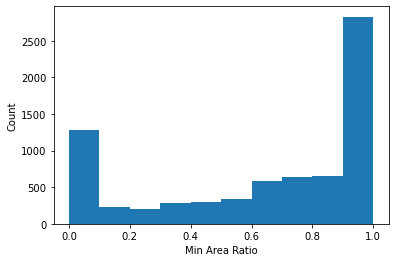

In [439]:
plt.hist(df["Min Area Ratio"])
plt.xlabel("Min Area Ratio")
plt.ylabel("Count")

In [312]:
def only_finite(arr):
    return arr[np.where(arr != np.inf)[0]]

In [316]:
def discard_exterior_percentage(arr, p):
    sorted_vals = np.sort(arr)
    p_num = int(len(sorted_vals) * p)
    return sorted_vals[p_num:-p_num]

In [332]:
def discard_top_percentage(arr, p):
    sorted_vals = np.sort(arr)
    p_num = int(len(sorted_vals) * p)
    return sorted_vals[:-p_num]

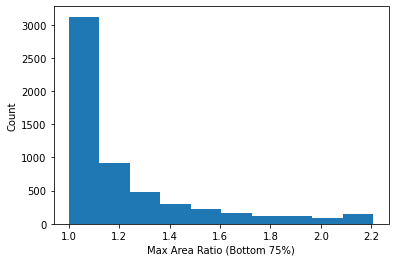

In [382]:
plt.hist(discard_top_percentage(df["Max Area Ratio"], 0.25))
plt.xlabel("Max Area Ratio (Bottom 75%)")
plt.ylabel("Count")
plt.show()

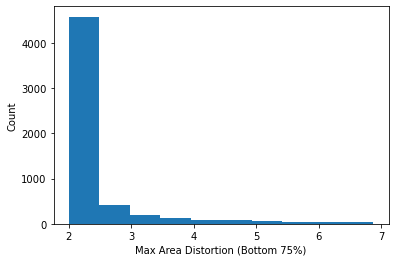

In [381]:
plt.hist(discard_top_percentage(df["Max Area Distortion"], 0.25))
plt.xlabel("Max Area Distortion (Bottom 75%)")
plt.ylabel("Count")
plt.show()

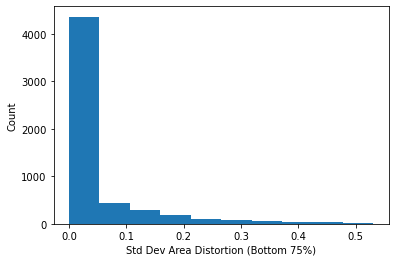

In [380]:
plt.hist(discard_top_percentage(df["Std Dev Area Distortion"], 0.25))
plt.xlabel("Std Dev Area Distortion (Bottom 75%)")
plt.ylabel("Count")
plt.show()

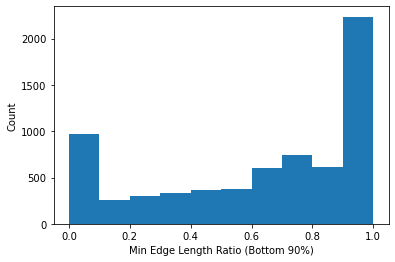

In [379]:
plt.hist(discard_top_percentage(df["Min Edge Length Ratio"], 0.1))
plt.xlabel("Min Edge Length Ratio (Bottom 90%)")
plt.ylabel("Count")
plt.show()

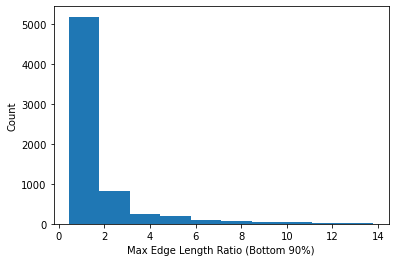

In [378]:
plt.hist(discard_top_percentage(df["Max Edge Length Ratio"], 0.1))
plt.xlabel("Max Edge Length Ratio (Bottom 90%)")
plt.ylabel("Count")
plt.show()

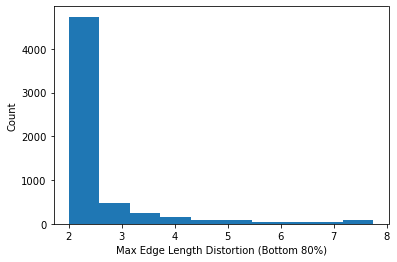

In [377]:
plt.hist(discard_top_percentage(df["Max Edge Length Distortion"], 0.2))
plt.xlabel("Max Edge Length Distortion (Bottom 80%)")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

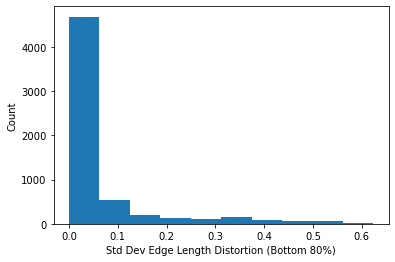

In [355]:
plt.hist(discard_top_percentage(df["Std Dev Edge Length Distortion"], 0.2))
plt.xlabel("Std Dev Edge Length Distortion (Bottom 80%)")
plt.ylabel("Count")

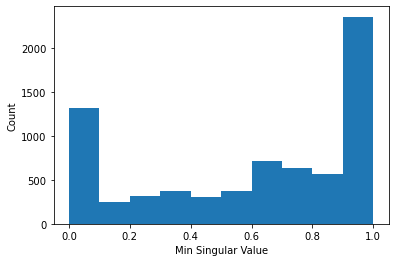

In [373]:
plt.hist(df["Min Singular Value"])
plt.xlabel("Min Singular Value")
plt.ylabel("Count")
plt.show()

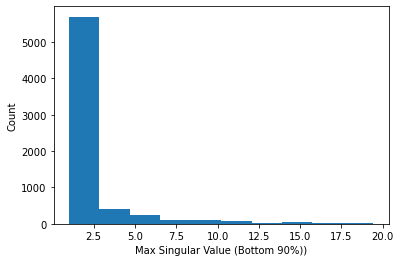

In [372]:
plt.hist(discard_top_percentage(df["Max Singular Value"], 0.1))
plt.xlabel("Max Singular Value (Bottom 90%))")
plt.ylabel("Count")
plt.show()

In [364]:
def discard_top_rows(df, col, p):
    sorted_df = df.sort_values(col)
    p_num = int(len(sorted_df) * p)
    return sorted_df.loc[:len(sorted_df)-p_num]

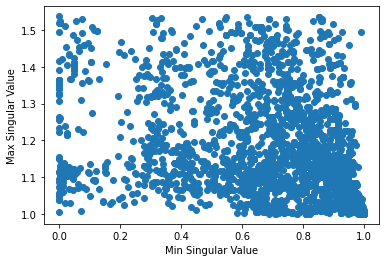

In [371]:
df_d = discard_top_rows(df, "Max Singular Value", 0.02)
plt.scatter(df_d["Min Singular Value"], df_d["Max Singular Value"])
plt.xlabel("Min Singular Value")
plt.ylabel("Max Singular Value")
plt.show()

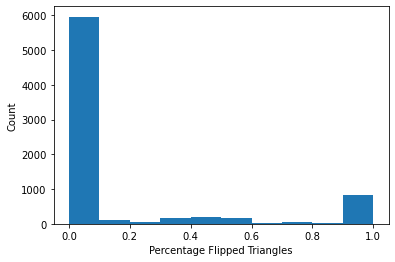

In [376]:
plt.hist(df["Percentage Flipped Triangles"])
plt.xlabel("Percentage Flipped Triangles")
plt.ylabel("Count")
plt.show()

In [562]:
df_t = pd.read_csv("triangle_singular_values.csv")

In [563]:
df_t.head()

,Unnamed: 0,Filename,Triangle Number,Singular Value 1,Singular Value 2
0,0,object_111_jack_o_lantern_5.obj,0,1.009993,0.996638
1,1,object_111_jack_o_lantern_5.obj,1,1.025709,0.995636
2,2,object_111_jack_o_lantern_5.obj,2,1.015655,0.999716
3,3,object_111_jack_o_lantern_5.obj,3,1.016221,0.995780
4,4,object_111_jack_o_lantern_5.obj,4,1.021458,0.996788


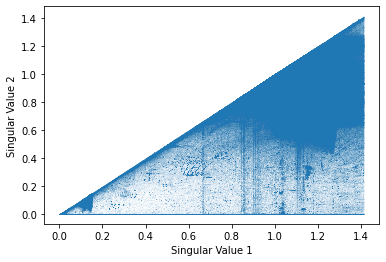

In [575]:
df_dt = discard_top_rows(df_t, "Singular Value 1", 0.01)
plt.scatter(df_dt["Singular Value 1"], df_dt["Singular Value 2"], s=0.0001)
plt.xlabel("Singular Value 1")
plt.ylabel("Singular Value 2")
plt.show()

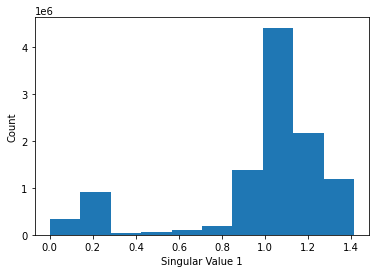

In [577]:
plt.hist(df_dt["Singular Value 1"])
plt.xlabel("Singular Value 1")
plt.ylabel("Count")
plt.show()

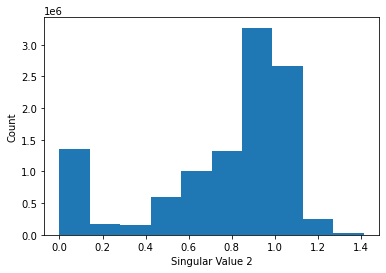

In [579]:
plt.hist(df_dt["Singular Value 2"])
plt.xlabel("Singular Value 2")
plt.ylabel("Count")
plt.show()

In [580]:
area_distortion = df_dt["Singular Value 1"] * df_dt["Singular Value 2"] + \
1/(df_dt["Singular Value 1"] * df_dt["Singular Value 2"])

angle_distortion = df_dt["Singular Value 1"]/df_dt["Singular Value 2"] + \
df_dt["Singular Value 2"]/df_dt["Singular Value 1"]

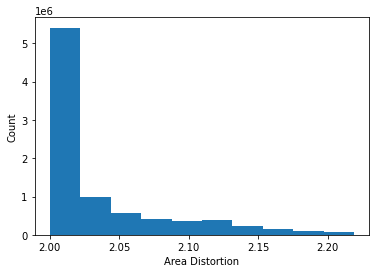

In [589]:
plt.hist(discard_top_percentage(area_distortion, 0.2))
plt.xlabel("Area Distortion")
plt.ylabel("Count")
plt.show()

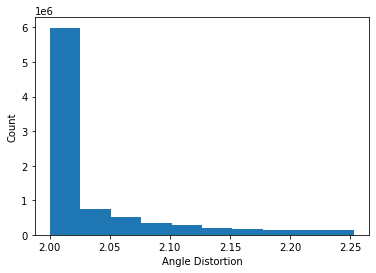

In [590]:
plt.hist(discard_top_percentage(angle_distortion, 0.2))
plt.xlabel("Angle Distortion")
plt.ylabel("Count")
plt.show()

In [623]:
df_aa = pd.DataFrame({"angle": angle_distortion, "area": area_distortion})
rows = np.where(np.logical_and(df_aa["angle"] < 1e4, df_aa["area"] < 1e4))[0]
df_aad = df_aa.iloc[rows]

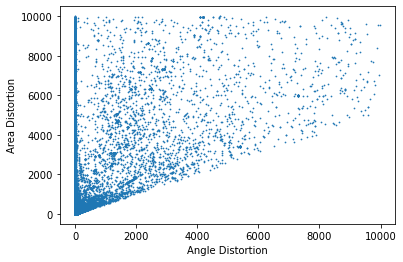

In [624]:
plt.scatter(df_aad["angle"], df_aad["area"], s=0.5)
plt.xlabel("Angle Distortion")
plt.ylabel("Area Distortion")
plt.show()

In [6]:
def face_proj(f):
    num_faces = f.shape[0]
    data = f.reshape((-1,))
    rows = np.arange(0, num_faces).repeat(3)
    cols = np.arange(0, num_faces).repeat(3)
    cols[1::3] += num_faces
    cols[2::3] += 2*num_faces
    return scipy.sparse.csr_matrix((data, (rows, cols)))

In [ ]:
v, uv, n, f, ftc, fn = igl.read_obj(os.path.join(dataset_folder, "object_224_scotch_tape_dispenser_14.obj"))

In [467]:
v, uv, n, f, ftc, fn = igl.read_obj(os.path.join(dataset_folder, "object_76_greek_tablet_1.obj"))

In [468]:
f = f.reshape((-1, 3))

In [469]:
ftc = ftc.reshape((-1, 3))

In [470]:
mesh_areas = np.abs(igl.doublearea(v, f)/2.0).reshape((1, -1))
uv_areas = np.abs(igl.doublearea(uv, ftc)/2.0).reshape((1, -1))

In [471]:
total_mesh_area = np.sum(mesh_areas)
total_uv_area = np.sum(uv_areas)

In [472]:
area_scale_factor = total_mesh_area/total_uv_area
edge_scale_factor = np.sqrt(area_scale_factor)

In [473]:
area_ratios = uv_areas/mesh_areas
scaled_area_ratios = area_ratios * area_scale_factor
scaled_area_distortions = scaled_area_ratios + 1/scaled_area_ratios

<ipython-input-473-ab21da9730b0>:3: RuntimeWarning: divide by zero encountered in true_divide
  scaled_area_distortions = scaled_area_ratios + 1/scaled_area_ratios


In [474]:
smallest_area_ratio = np.min(scaled_area_ratios)
largest_area_ratio = np.max(scaled_area_ratios)
mean_area_ratio = np.sqrt(np.sum(uv_areas * np.square(scaled_area_ratios))/total_uv_area)
largest_area_distortion = np.max(scaled_area_distortions)
std_dev_area_distortion = np.std(scaled_area_distortions)

/Users/georgiashay/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [475]:
mesh_edge_co = v[igl.edges(f)]
mesh_edge_lengths = np.linalg.norm(mesh_edge_co[:, 0] - mesh_edge_co[:, 1], axis=1)

In [476]:
uv_to_v = {}
for i, face in enumerate(f):
    for j, v_idx in enumerate(face):
        uv_idx = ftc[i][j]
        uv_to_v[uv_idx] = v_idx

uv_c = np.array([co for i, co in sorted(enumerate(uv), key=lambda i_co: uv_to_v[i_co[0]])])

In [477]:
uv_edge_co = uv_c[igl.edges(f)]
uv_edge_lengths = np.linalg.norm(uv_edge_co[:, 0] - uv_edge_co[:, 1], axis=1)
scaled_uv_edge_lengths = uv_edge_lengths * edge_scale_factor

In [478]:
edge_length_ratios = scaled_uv_edge_lengths/mesh_edge_lengths
edge_length_distortion = edge_length_ratios + 1/edge_length_ratios

In [479]:
min_edge_length_ratio = np.min(edge_length_ratios)
max_edge_length_ratio = np.max(edge_length_ratios)
max_edge_length_distortion = np.max(edge_length_distortion)
std_dev_edge_length_distortion = np.std(edge_length_distortion)

In [480]:
G = igl.grad(v, f)
f1, f2, f3 = igl.local_basis(v, f)

In [481]:
f1 = f1.reshape((-1, 3))
f2 = f2.reshape((-1, 3))
f3 = f3.reshape((-1, 3))

In [482]:
dx = face_proj(f1) @ G
dy = face_proj(f2) @ G

In [483]:
scaled_per_vertex_uv = uv_c * edge_scale_factor

J = np.zeros((f.shape[0], 2, 2))

J[:,0,0] = dx @ scaled_per_vertex_uv[:,0]
J[:,0,1] = dy @ scaled_per_vertex_uv[:,0]
J[:,1,0] = dx @ scaled_per_vertex_uv[:,1]
J[:,1,1] = dy @ scaled_per_vertex_uv[:,1]

In [484]:
singular_values = np.linalg.svd(J)[1]
min_singular_value = np.min(singular_values)
max_singular_value = np.max(singular_values)

In [485]:
dets = np.linalg.det(J)
flipped = dets < 0
percent_flipped = np.sum(flipped)/flipped.shape[0]

In [815]:
mesh = pymesh.load_mesh(os.path.join(dataset_folder, "object_129_hellraiser_3.obj"))
v, uv, n, f, ftc, fn = igl.read_obj(os.path.join(dataset_folder, "object_129_hellraiser_3.obj"))

In [807]:
mesh = pymesh.load_mesh(os.path.join(dataset_folder, "object_19_moon_0.obj"))
v, uv, n, f, ftc, fn = igl.read_obj(os.path.join(dataset_folder, "object_19_moon_0.obj"))

In [876]:
mesh = pymesh.load_mesh(os.path.join(dataset_folder, "object_129_hellraiser_28.obj"))
v, uv, n, f, ftc, fn = igl.read_obj(os.path.join(dataset_folder, "object_129_hellraiser_28.obj"))

In [877]:
faces = mesh.faces.shape[0]
boundary_triangles = 0
for i in range(faces):
    print(i, "/", faces, end="\r")
    triangle_edges = mesh.faces[i, [[0,1], [1,0], [1,2], [2,1], [0,2], [2,0]]].reshape(-1, 1, 2)
    boundary_edges = mesh.boundary_edges.reshape(1, -1, 2)

    equal = np.equal(triangle_edges, boundary_edges)
    edges_equal = equal.all(axis=2)
    is_boundary_edge = edges_equal.any(axis=1)
    is_boundary_triangle = is_boundary_edge.reshape((-1, 6)).any(axis=1)[0]
    boundary_triangles += is_boundary_triangle

In [878]:
np.sum(np.any(igl.triangle_triangle_adjacency(mesh.faces)[0].reshape((-1, 3)) == -1, axis=1))

1278

In [824]:
len(mesh.faces) - np.sum(np.any(igl.triangle_triangle_adjacency(f)[0] == -1, axis=1))

617

In [836]:
igl.triangle_triangle_adjacency(f)[0]

array([[ 1523,    -1,     1],
       [    4,     0,    -1],
       [27204,     6,    -1],
       ...,
       [   -1, 27313, 27315],
       [27314, 27316,    -1],
       [27315,     4,    -1]], dtype=int64)

In [837]:
mesh.faces[1]

array([11261, 11266,     0], dtype=int32)

In [846]:
[0, 11261] in mesh.boundary_edges.tolist()

True

In [ ]:
# Need to check both orderings of the edge
# just use igl

In [825]:
mesh.faces

array([[11266,     1,     0],
       [11261, 11266,     0],
       [11262, 26908, 11261],
       ...,
       [26981, 26980, 11266],
       [26981, 11266, 11260],
       [11260, 11266, 26982]], dtype=int32)

In [774]:
triangle_edges = mesh.faces[0, [[0,1], [1,2], [0,2]]].reshape(-1, 1, 2)

In [834]:
i = 1
triangle_edges = mesh.faces[i, [[0,1], [1,2], [0,2]]].reshape(-1, 1, 2)
boundary_edges = mesh.boundary_edges.reshape(1, -1, 2)

equal = np.equal(triangle_edges, boundary_edges)
edges_equal = equal.all(axis=2)
is_boundary_edge = edges_equal.any(axis=1)
is_boundary_triangle = is_boundary_edge.reshape((-1, 3)).any(axis=1)[0]
is_boundary_triangle

False

In [776]:
boundary_edges = mesh.boundary_edges.reshape(1, -1, 2)

In [777]:
equal = np.equal(triangle_edges, boundary_edges)

In [779]:
edges_equal = equal.all(axis=2)

In [780]:
is_boundary_edge = edges_equal.any(axis=1)

In [783]:
is_boundary_edge.any()

True

In [757]:
is_boundary_triangle = is_boundary_edge.reshape((-1, 3)).any(axis=1)

In [761]:
is_boundary_triangle[0]

3

In [751]:
boundary_triangles = np.sum(is_boundary_triangle)

In [752]:
boundary_triangles

1